In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jeju_card_df = pd.read_csv('data/jeju_card.csv')

In [5]:
jeju_card_df.shape

(19573, 11)

In [7]:
jeju_card_df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [9]:
jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [11]:
jeju_card_df.describe(include = 'all')

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,제주도,제주시,도심,식음료,내국인관광객,50대,남,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [13]:
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [15]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



2017년, 2018년의 데이터만 추출하기

In [18]:
jeju_card_df['연도'] = jeju_card_df['연월'].str.split('-').str[0]

In [20]:
jeju_card_df = jeju_card_df[jeju_card_df['연도'] != '2016']

In [22]:
jeju_card_df.shape

(16707, 12)

연령대 컬럼 전처리

In [25]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

시도명
['제주도'] 

시군구명
['제주시' '서귀포시'] 

지역구분
['읍면' '도심'] 

업종명
['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타'] 

이용자 구분
['제주도민' '내국인관광객'] 

연령대
['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만'] 

성별
['여' '남'] 

연월
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01'] 



In [27]:
jeju_card_df.loc[jeju_card_df['연령대'] == '20 미만', '연령대'] = '20대미만'

In [30]:
jeju_card_df['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

In [32]:
jeju_card_df.groupby('연월').sum(numeric_only = True)

,이용자수,이용횟수,이용금액
연월,,,
2017-01,2044697,3962878,158062633602
2017-02,1937989,3686906,142673272629
2017-03,2139087,4265024,158170622304
2017-04,2261037,4428571,164145266282
2017-05,2422539,4744952,174450463090
2017-06,2328383,4606602,166023890619
2017-07,2520117,5048178,177270011408
2017-08,2634037,5212389,178853518885
2017-09,2374142,4765159,168355520204


In [34]:
groupby_ym = jeju_card_df.groupby('연월').sum(numeric_only = True).reset_index()
groupby_ym

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


<Axes: xlabel='연월', ylabel='이용금액'>

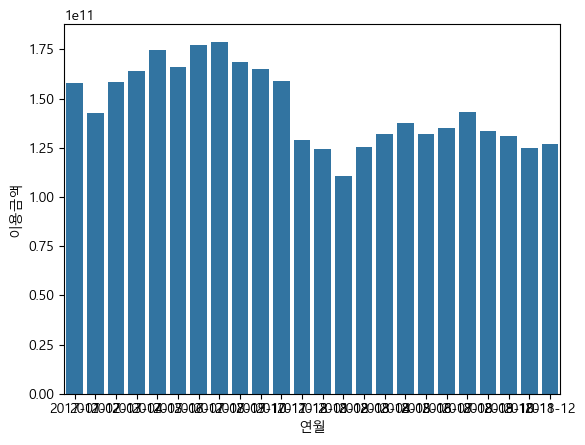

In [38]:
plt.rc('font', family='Malgun Gothic')
sns.barplot(data = groupby_ym, x = '연월', y = '이용금액')

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 1.0, '연월별 카드 이용 금액')

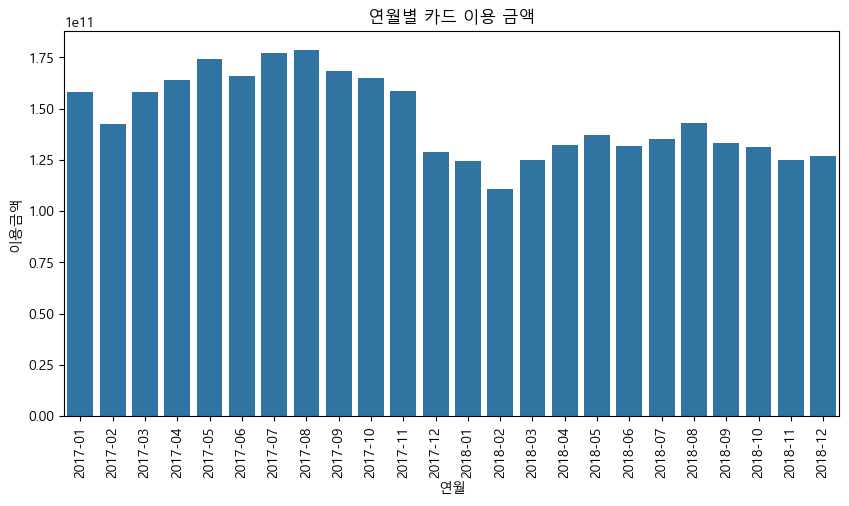

In [42]:
sns.barplot(data = groupby_ym, x = '연월', y = '이용금액')
plt.xticks(rotation = 90)
plt.title('연월별 카드 이용 금액')

Text(0, 0.5, '이용금액(억)')

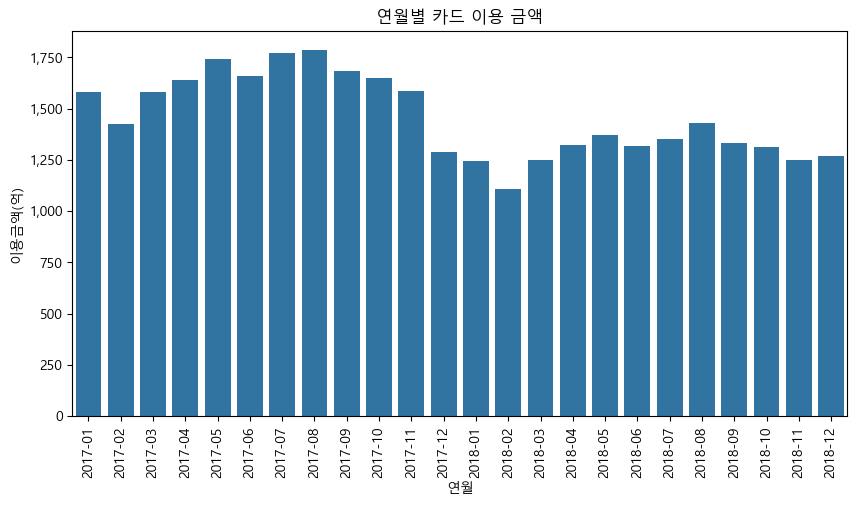

In [48]:
sns.barplot(data=groupby_ym, x='연월', y='이용금액')
plt.xticks(rotation=90)
plt.title('연월별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [50]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()
groupby_ym_age

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4800559,9304114,208175160124
1,2017,20대미만,203078,429896,4996657612
2,2017,30대,7080363,13499213,437721213544
3,2017,40대,6965143,14414930,561248406540
4,2017,50대,5158034,10314259,468286978356
5,2017,60대이상,2640430,5069478,260136246561
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


Text(0, 0.5, '이용금액(억)')

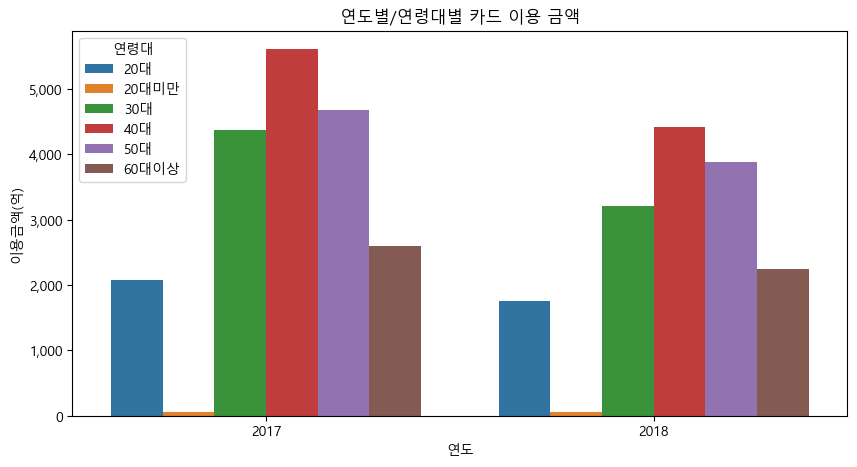

In [52]:
sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [54]:
jeju_card_df['연령대'] = pd.Categorical(jeju_card_df['연령대'],
                                      categories=['20대미만', '20대', '30대', '40대', '50대', '60대이상'],
                                      ordered=True)

C:\Users\leoyo\AppData\Local\Temp\ipykernel_15824\4206172065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()


Text(0, 0.5, '이용금액(억)')

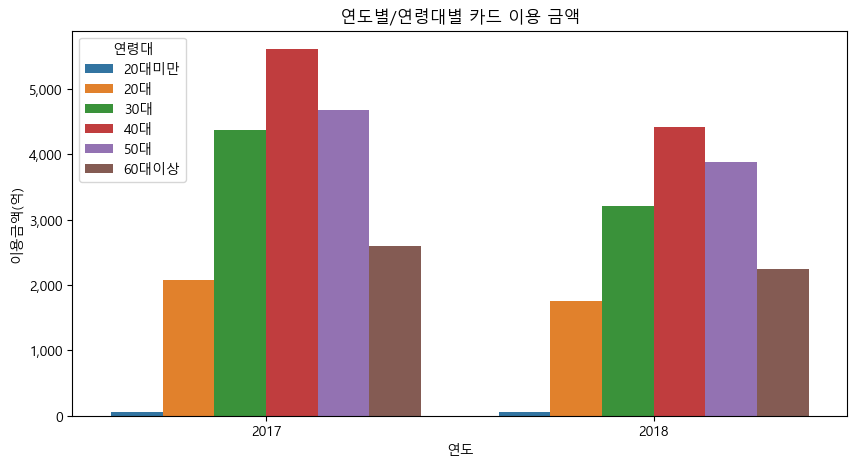

In [56]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [58]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()
groupby_ym_user

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


Text(0, 0.5, '이용금액(억)')

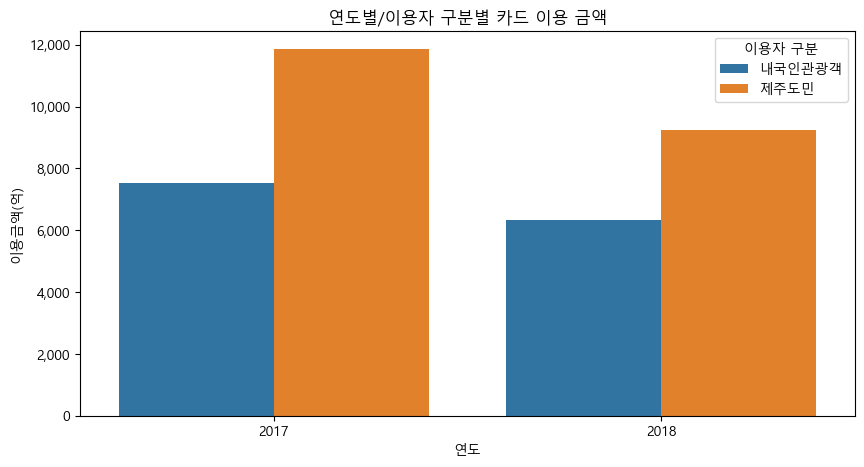

In [60]:
sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

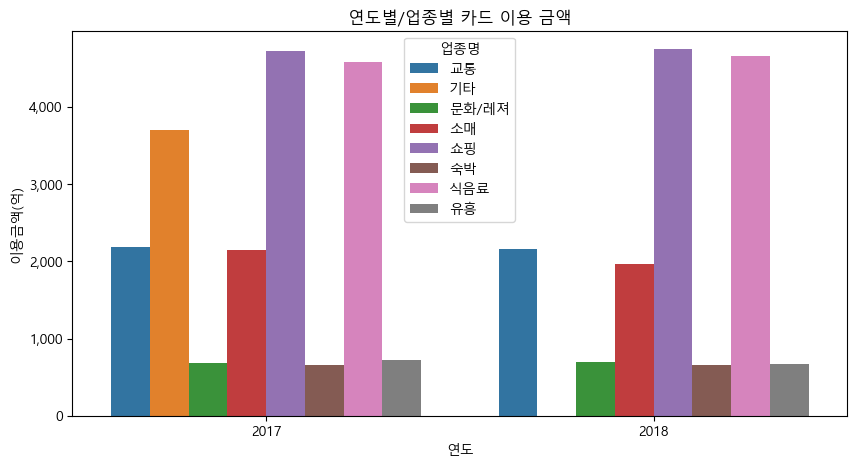

In [62]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

In [66]:
jeju_card_df[jeju_card_df['업종명'] == '기타']

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도
8820,제주도,제주시,읍면,기타,제주도민,60대이상,여,2017-11,515,1087,68991695,2017
8821,제주도,제주시,읍면,기타,제주도민,60대이상,남,2017-11,1320,2902,248832140,2017
8822,제주도,제주시,읍면,기타,제주도민,50대,여,2017-11,825,1586,105991421,2017
8823,제주도,제주시,읍면,기타,제주도민,50대,남,2017-11,1623,3314,344444658,2017
8824,제주도,제주시,읍면,기타,제주도민,40대,여,2017-11,1064,1955,197205323,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
16682,제주도,서귀포시,도심,기타,내국인관광객,30대,여,2017-01,1126,1661,61983110,2017
16683,제주도,서귀포시,도심,기타,내국인관광객,30대,남,2017-01,1289,1902,54641270,2017
16684,제주도,서귀포시,도심,기타,내국인관광객,20대,여,2017-01,795,1060,29265651,2017
16685,제주도,서귀포시,도심,기타,내국인관광객,20대,남,2017-01,719,987,19987700,2017


In [68]:
jeju_card_df[jeju_card_df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01'],
      dtype=object)

In [70]:
jeju_card_df = jeju_card_df[jeju_card_df['업종명'] != '기타']

C:\Users\leoyo\AppData\Local\Temp\ipykernel_15824\4206172065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()


Text(0, 0.5, '이용금액(억)')

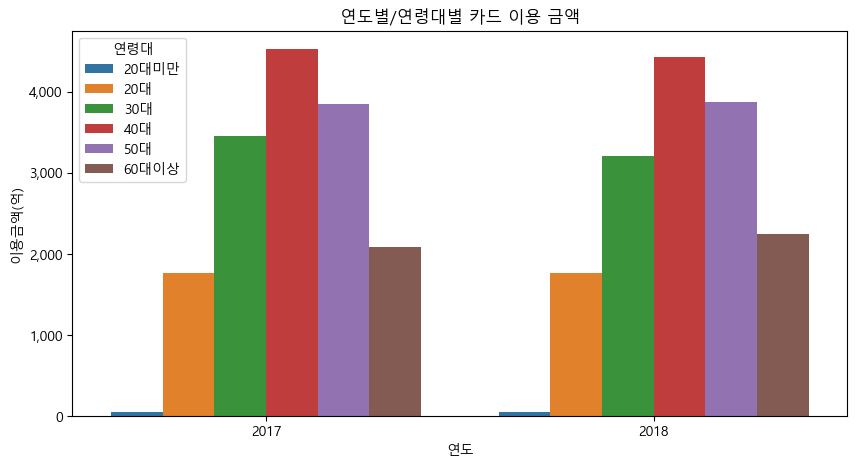

In [72]:
groupby_ym_age = jeju_card_df.groupby(['연도', '연령대']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_age, x='연도', y='이용금액', hue='연령대')
plt.title('연도별/연령대별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

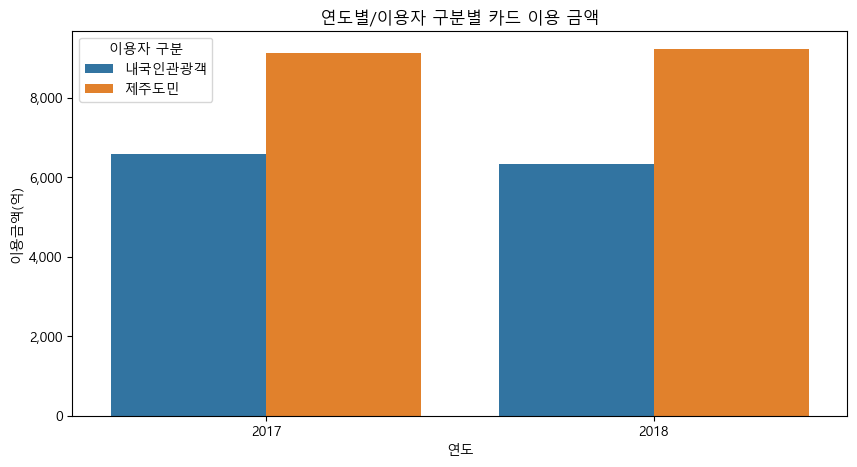

In [74]:
groupby_ym_user = jeju_card_df.groupby(['연도', '이용자 구분']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_user, x='연도', y='이용금액', hue='이용자 구분')
plt.title('연도별/이용자 구분별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0, 0.5, '이용금액(억)')

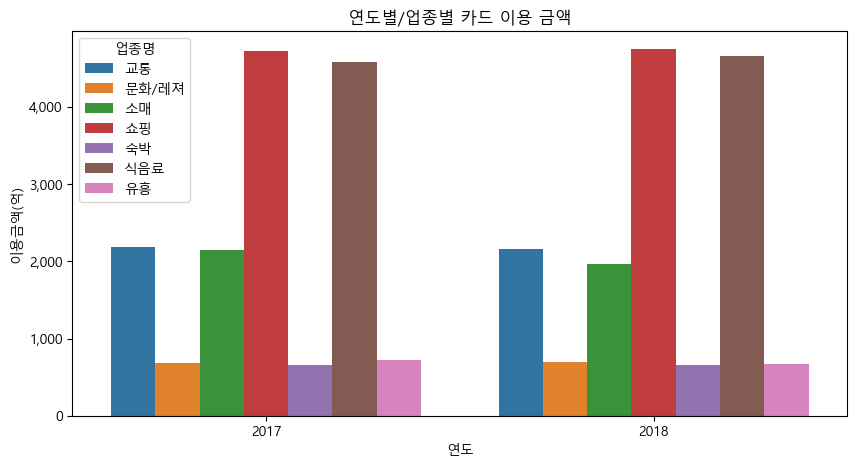

In [76]:
groupby_ym_market = jeju_card_df.groupby(['연도', '업종명']).sum(numeric_only=True).reset_index()

sns.barplot(data=groupby_ym_market, x='연도', y='이용금액', hue='업종명')
plt.title('연도별/업종별 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

연령대별 이용 금액 시각화

In [83]:
groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()
groupby_age

C:\Users\leoyo\AppData\Local\Temp\ipykernel_15824\1907209219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age = jeju_card_df.groupby('연령대').sum(numeric_only=True).reset_index()


,연령대,이용자수,이용횟수,이용금액
0,20대미만,401769,879205,9478228519
1,20대,8609569,17330083,352340324557
2,30대,11943645,23231348,665648456005
3,40대,12151108,25588896,894568725640
4,50대,9141502,18600897,771684016455
5,60대이상,4683296,9062038,433293299324


Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

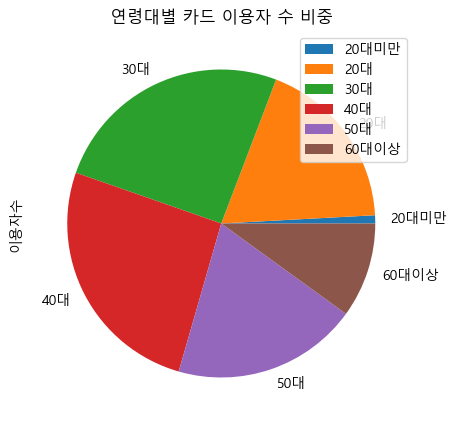

In [85]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'])
plt.title('연령대별 카드 이용자 수 비중')

Text(0.5, 1.0, '연령대별 카드 이용자 수 비중')

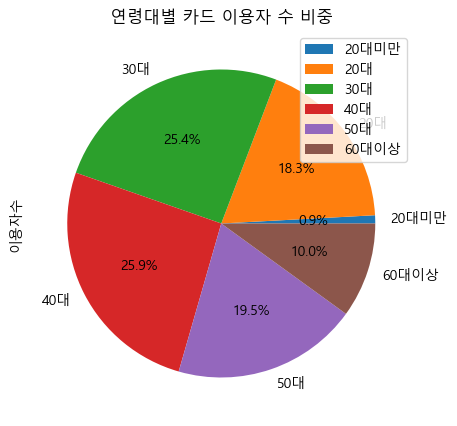

In [87]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')

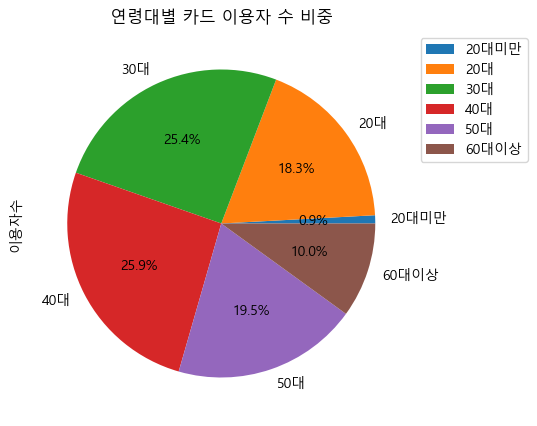

In [89]:
groupby_age.plot(kind='pie', y='이용자수', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용자 수 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

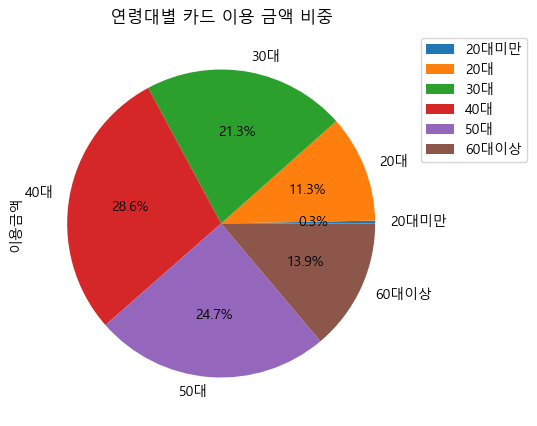

In [91]:
groupby_age.plot(kind='pie', y='이용금액', labels=groupby_age['연령대'], autopct='%.1f%%')
plt.title('연령대별 카드 이용 금액 비중')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [93]:
groupby_age['인당이용금액'] = groupby_age['이용금액'] / groupby_age['이용자수']
groupby_age

,연령대,이용자수,이용횟수,이용금액,인당이용금액
0,20대미만,401769,879205,9478228519,23591.239043
1,20대,8609569,17330083,352340324557,40924.269793
2,30대,11943645,23231348,665648456005,55732.438130
3,40대,12151108,25588896,894568725640,73620.341918
4,50대,9141502,18600897,771684016455,84415.451252
5,60대이상,4683296,9062038,433293299324,92518.879721


Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

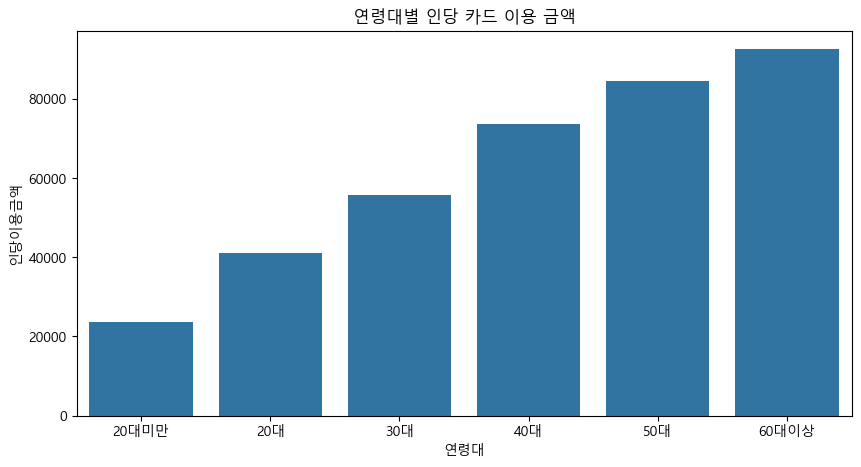

In [95]:
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

Text(0.5, 1.0, '연령대별 인당 카드 이용 금액')

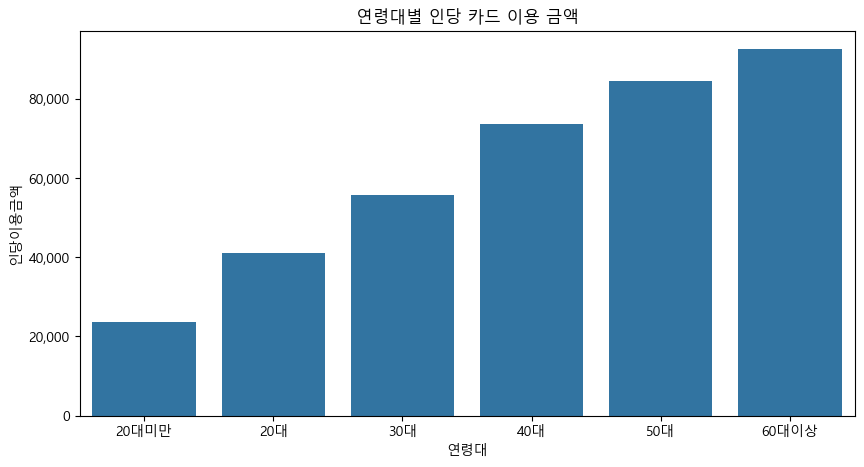

In [97]:
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot(data=groupby_age, x='연령대', y='인당이용금액')
plt.title('연령대별 인당 카드 이용 금액')

In [99]:
groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()
groupby_age_market.head()

C:\Users\leoyo\AppData\Local\Temp\ipykernel_15824\3207886284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_market = jeju_card_df.groupby(['연령대', '업종명']).sum(numeric_only=True).reset_index()


,연령대,업종명,이용자수,이용횟수,이용금액
0,20대미만,교통,3740,4705,285316774
1,20대미만,문화/레져,40499,80073,805245645
2,20대미만,소매,56257,77825,1638514065
3,20대미만,쇼핑,164635,453747,3008788954
4,20대미만,숙박,3681,4953,114390996


Text(0, 0.5, '이용금액(억)')

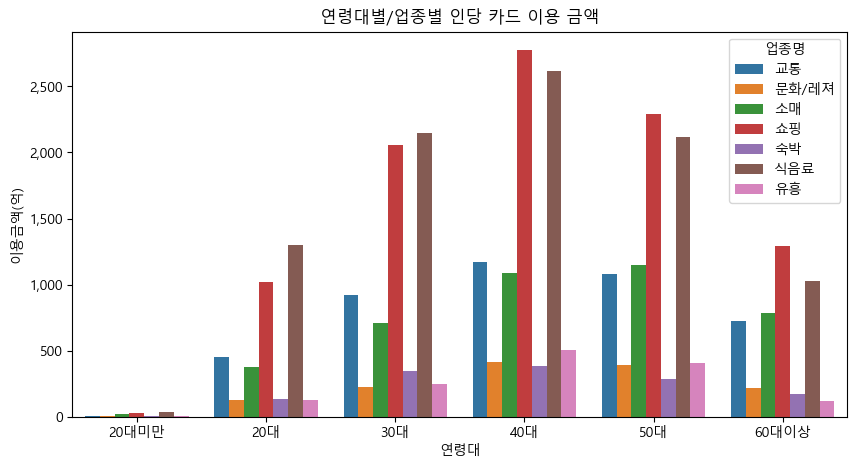

In [101]:
sns.barplot(data=groupby_age_market, x='연령대', y='이용금액', hue='업종명')
plt.title('연령대별/업종별 인당 카드 이용 금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')

Text(0.5, 1.0, '연령대별/업종별 인당 카드 이용 금액')

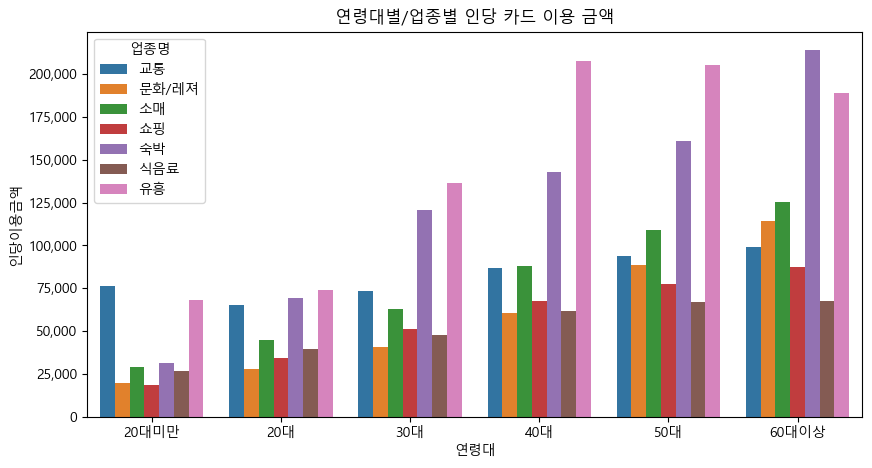

In [103]:
groupby_age_market['인당이용금액'] = groupby_age_market['이용금액'] / groupby_age_market['이용자수']

sns.barplot(data=groupby_age_market, x='연령대', y='인당이용금액', hue='업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('연령대별/업종별 인당 카드 이용 금액')

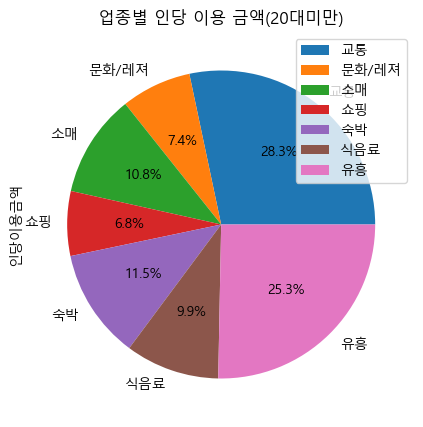

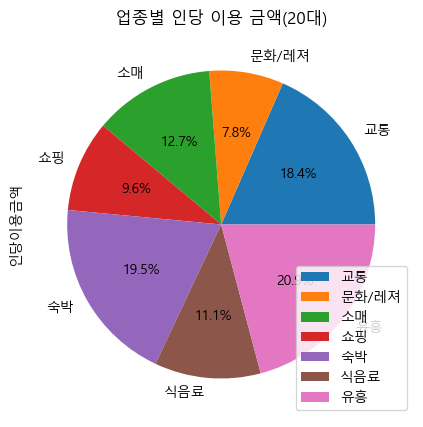

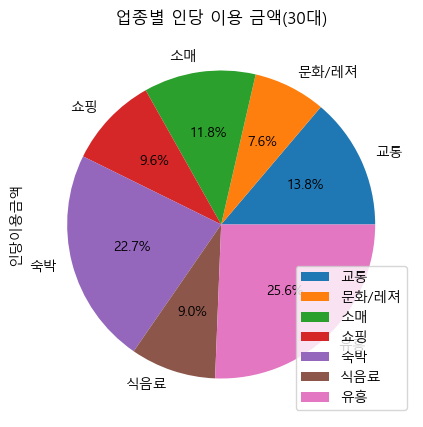

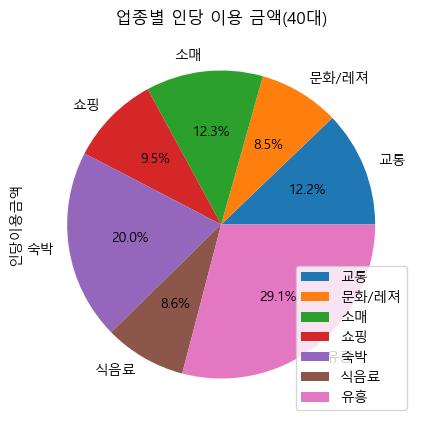

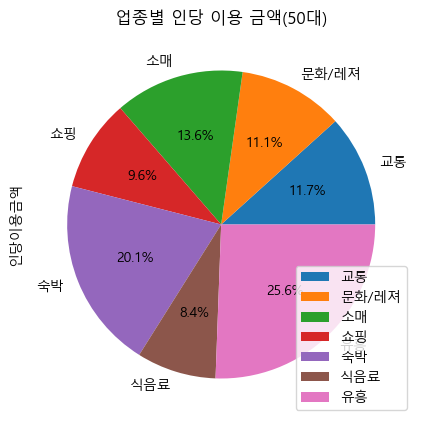

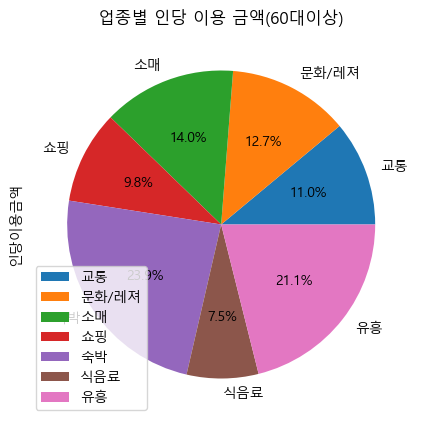

In [105]:
for age in groupby_age_market['연령대'].unique():
    data = groupby_age_market[groupby_age_market['연령대'] == age]
    data.plot(y='인당이용금액', labels=data['업종명'], kind='pie', autopct='%.1f%%')
    plt.title(f'업종별 인당 이용 금액({age})')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\leoyo\AppData\Local\Temp\ipykernel_15824\3539580425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()


<Axes: xlabel='연령대', ylabel='이용자수'>

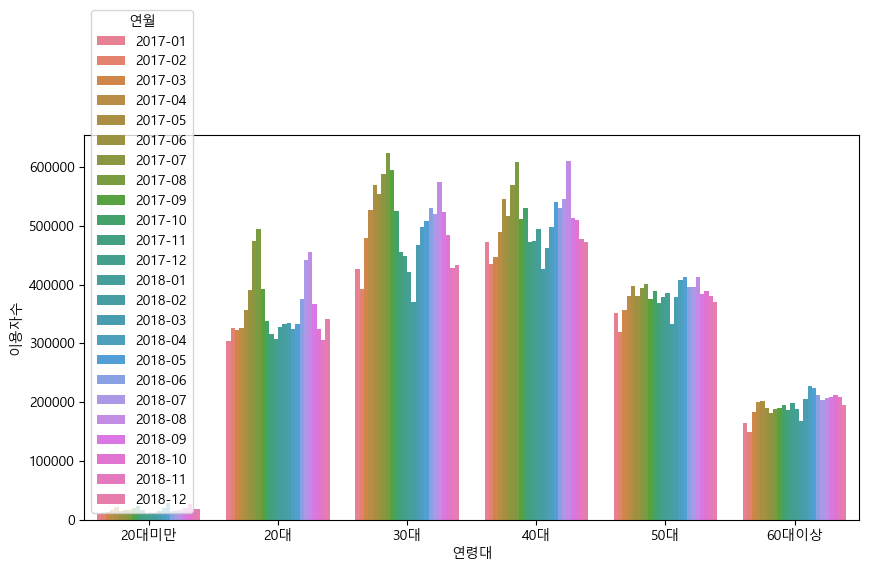

In [107]:
groupby_age_ym = jeju_card_df.groupby(['연령대', '연월']).sum(numeric_only=True).reset_index()
sns.barplot(data=groupby_age_ym, x='연령대', y='이용자수', hue='연월')

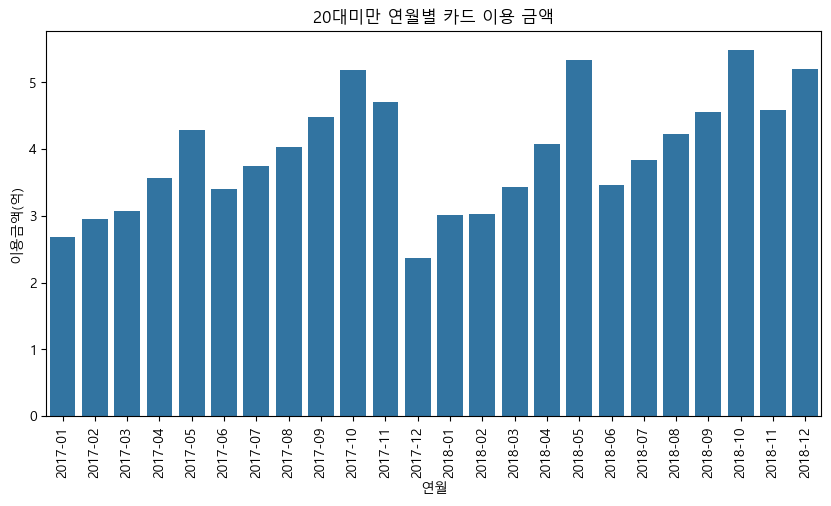

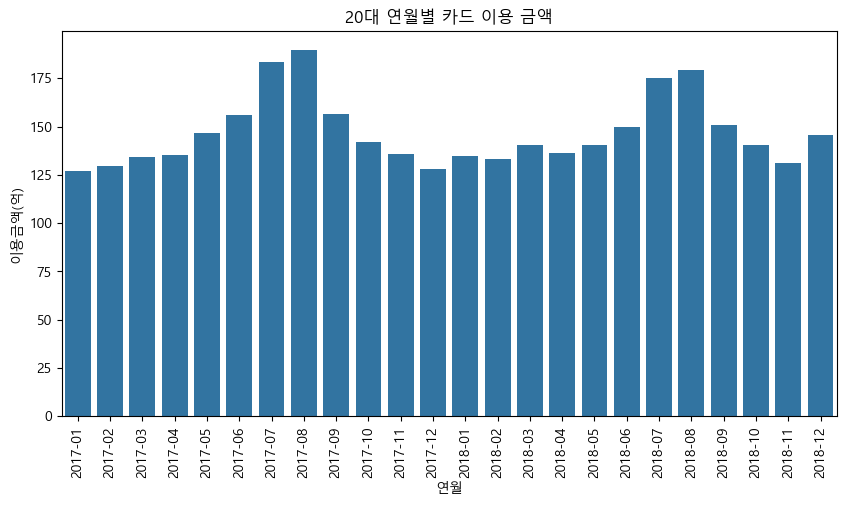

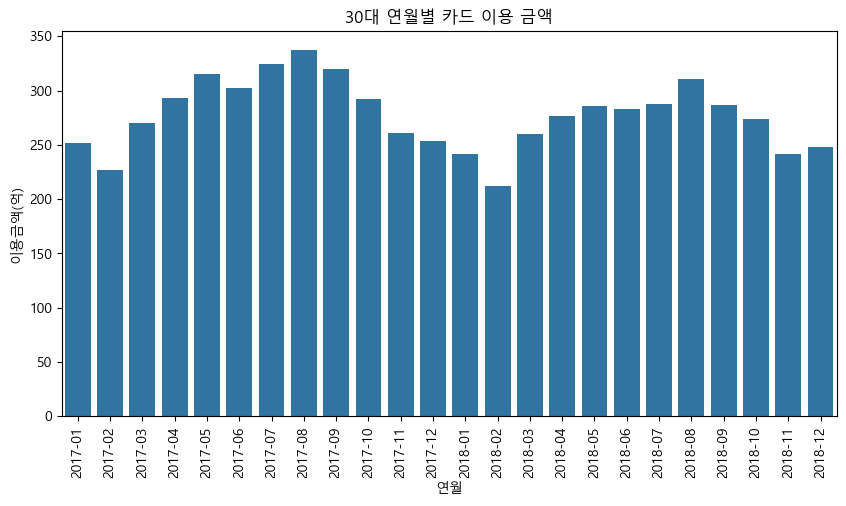

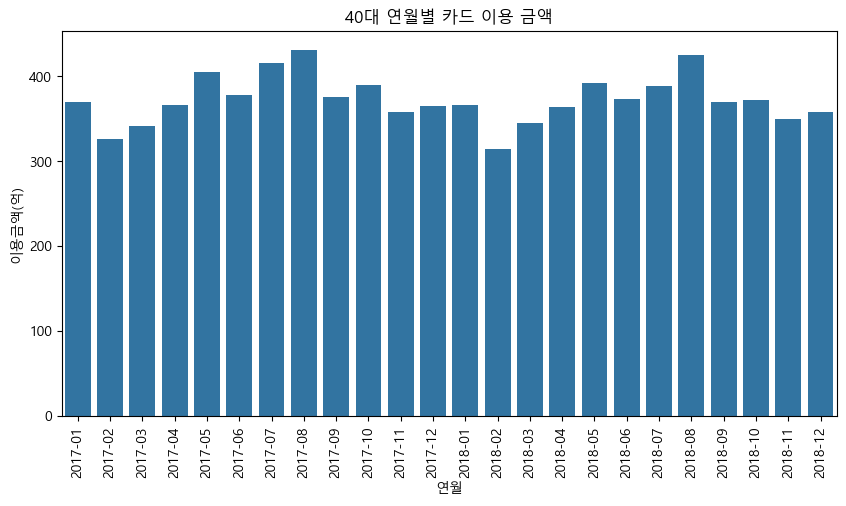

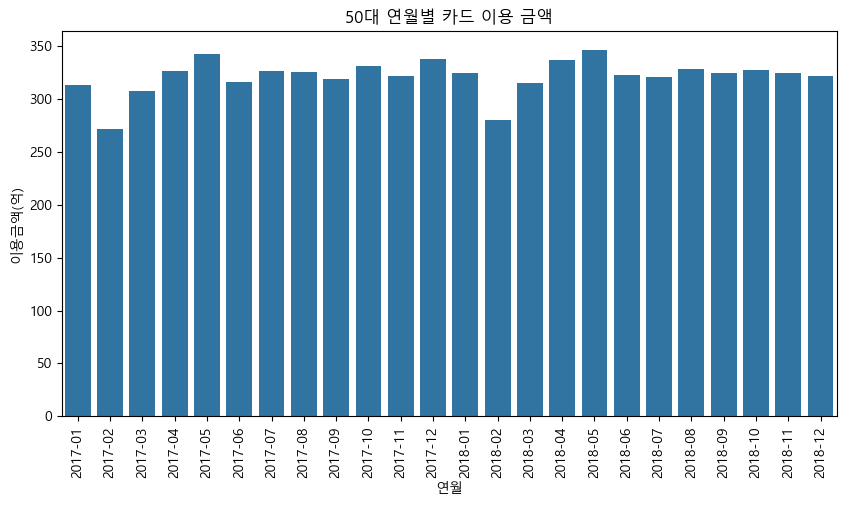

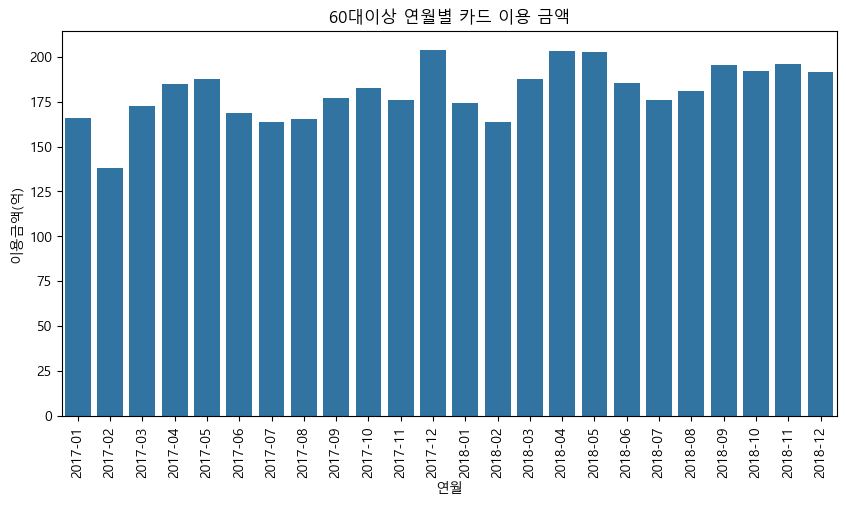

In [109]:
for age in groupby_age_ym['연령대'].unique():
    data = groupby_age_ym[groupby_age_ym['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액')
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
jeju_reg_17_df = pd.read_csv('data/jeju_card_region_2017.csv')
jeju_reg_18_df = pd.read_csv('data/jeju_card_region_2018.csv')
jeju_pop_df = pd.read_csv('data/jeju_population.csv')

In [7]:
print(jeju_reg_17_df.shape) 
print(jeju_reg_18_df.shape)
print(jeju_pop_df.shape)   

(26968, 7)
(27183, 7)
(527026, 6)


In [9]:
jeju_reg_17_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000


In [11]:
jeju_reg_18_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2018-01-01,제주시,아라동,차량용 주유소 운영업,남성,3954,205339045
1,2018-01-01,제주시,삼도1동,차량용 주유소 운영업,남성,490,29469792
2,2018-01-01,제주시,삼도2동,육류 소매업,여성,89,2386740
3,2018-01-01,제주시,삼도1동,스포츠 및 레크레이션 용품 임대업,남성,106,12517300
4,2018-01-01,제주시,삼도1동,수산물 소매업,남성,37,2621000


In [13]:
jeju_pop_df.head()

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174


In [15]:
jeju_reg_17_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26968 entries, 0 to 26967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      26968 non-null  object
 1   시군구명    26968 non-null  object
 2   읍면동명    26968 non-null  object
 3   업종명     26968 non-null  object
 4   성별      26968 non-null  object
 5   이용자수    26968 non-null  int64 
 6   이용금액    26968 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [17]:
jeju_reg_18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27183 entries, 0 to 27182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      27183 non-null  object
 1   시군구명    27183 non-null  object
 2   읍면동명    27183 non-null  object
 3   업종명     27183 non-null  object
 4   성별      27183 non-null  object
 5   이용자수    27183 non-null  int64 
 6   이용금액    27183 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [19]:
jeju_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527026 entries, 0 to 527025
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연월일     527026 non-null  int64 
 1   시군구명    527026 non-null  object
 2   읍면동명    527026 non-null  object
 3   성별      527026 non-null  object
 4   연령대     527026 non-null  object
 5   방문인구    527026 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 24.1+ MB


In [21]:
pd.options.display.float_format = '{:.3f}'.format
jeju_reg_17_df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,26968,26968,26968,26968,26968,26968.000,26968.000
unique,12,2,43,41,2,NaN,NaN
top,2017-11-01,제주시,노형동,슈퍼마켓,남성,NaN,NaN
freq,2265,16076,795,1032,13518,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1703.495,63231393.341
std,NaN,NaN,NaN,NaN,NaN,4313.161,198798394.063
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,43.000,2635000.000
50%,NaN,NaN,NaN,NaN,NaN,281.000,12125170.000
75%,NaN,NaN,NaN,NaN,NaN,1333.250,49059281.000


In [23]:
jeju_reg_18_df.describe(include='all')

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
count,27183,27183,27183,27183,27183,27183.000,27183.000
unique,12,2,43,41,2,NaN,NaN
top,2018-09-01,제주시,노형동,체인화 편의점,남성,NaN,NaN
freq,2285,16228,812,1032,13645,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1726.604,62044256.570
std,NaN,NaN,NaN,NaN,NaN,4399.634,190042848.439
min,NaN,NaN,NaN,NaN,NaN,1.000,10.000
25%,NaN,NaN,NaN,NaN,NaN,45.000,2706600.000
50%,NaN,NaN,NaN,NaN,NaN,288.000,12311900.000
75%,NaN,NaN,NaN,NaN,NaN,1339.000,49426169.000


In [25]:
jeju_pop_df.describe(include='all')

,연월일,시군구명,읍면동명,성별,연령대,방문인구
count,527026.000,527026,527026,527026,527026,527026.000
unique,NaN,2,43,2,9,NaN
top,NaN,제주시,삼도1동,여,60대,NaN
freq,NaN,318669,12264,263533,58592,NaN
mean,20175307.456,NaN,NaN,NaN,NaN,9931.281
std,4999.286,NaN,NaN,NaN,NaN,9974.524
min,20170101.000,NaN,NaN,NaN,NaN,0.000
25%,20170620.000,NaN,NaN,NaN,NaN,3292.000
50%,20171207.000,NaN,NaN,NaN,NaN,6811.000
75%,20180526.000,NaN,NaN,NaN,NaN,12783.000


In [27]:
def print_unique_values(df):
    object_columns = df.columns[df.dtypes == 'object']
    for col in object_columns:
        print(f'{col} 컬럼의 unique 값 개수: {df[col].nunique()}')
        print(sorted(df[col].unique()), '\n')

In [29]:
print_unique_values(jeju_reg_17_df)

연월 컬럼의 unique 값 개수: 12
['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'] 

시군구명 컬럼의 unique 값 개수: 2
['서귀포시', '제주시'] 

읍면동명 컬럼의 unique 값 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 컬럼의 unique 값 개수: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 

In [31]:
print_unique_values(jeju_reg_18_df)

연월 컬럼의 unique 값 개수: 12
['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'] 

시군구명 컬럼의 unique 값 개수: 2
['서귀포시', '제주시'] 

읍면동명 컬럼의 unique 값 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

업종명 컬럼의 unique 값 개수: 41
['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업

In [34]:
for item in jeju_reg_17_df['업종명'].unique():
    if item not in jeju_reg_18_df['업종명'].unique():
        print(f'2017년에만 있는 값: {item}')
        
for item in jeju_reg_18_df['업종명'].unique():
    if item not in jeju_reg_17_df['업종명'].unique():
        print(f'2018년에만 있는 값: {item}')

2017년에만 있는 값: 기타 갬블링 및 베팅업
2018년에만 있는 값: 택시 운송업


In [36]:
print(jeju_reg_17_df[jeju_reg_17_df['업종명'] == '기타 갬블링 및 베팅업'].shape) # (1, 7)
print(jeju_reg_18_df[jeju_reg_18_df['업종명'] == '택시 운송업'].shape)         # (4, 7)

(1, 7)
(4, 7)


In [38]:
jeju_reg_17_df = jeju_reg_17_df[jeju_reg_17_df['업종명'] != '기타 갬블링 및 베팅업']
jeju_reg_18_df = jeju_reg_18_df[jeju_reg_18_df['업종명'] != '택시 운송업']

In [40]:
for item in jeju_reg_17_df['읍면동명'].unique():
    if item not in jeju_reg_18_df['읍면동명'].unique():
        print(f'2017년에만 있는 값: {item}')
        
for item in jeju_reg_18_df['읍면동명'].unique():
    if item not in jeju_reg_17_df['읍면동명'].unique():
        print(f'2018년에만 있는 값: {item}')

In [42]:
jeju_reg_df = pd.concat([jeju_reg_17_df, jeju_reg_18_df])

In [44]:
jeju_reg_df.shape

(54146, 7)

In [46]:
jeju_reg_df['연월'].unique()

array(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
       '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
       '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
      dtype=object)

In [48]:
jeju_reg_df['연월'] = jeju_reg_df['연월'].str[:7]
jeju_reg_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000


# 카드 이용이 많은 업종은?

In [51]:
groupby_sector = jeju_reg_df.groupby('업종명').sum(numeric_only=True)

In [53]:
groupby_sector.sort_values(by='이용금액', ascending=False).head(10)

,이용자수,이용금액
업종명,,
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
면세점,2122760,216084015155
체인화 편의점,22577070,208385597308
기타 대형 종합 소매업,3026355,176181070237
일반유흥 주점업,541603,116184655729
스포츠 및 레크레이션 용품 임대업,991236,112011498985
정기 항공 운송업,640930,102803758104


In [55]:
groupby_sector.sort_values(by='이용자수', ascending=False).head(10)

,이용자수,이용금액
업종명,,
체인화 편의점,22577070,208385597308
한식 음식점업,18828766,764903591034
슈퍼마켓,11427536,303567124207
차량용 주유소 운영업,5683264,302282701948
서양식 음식점업,3483836,82613944504
빵 및 과자류 소매업,3295046,45801876571
기타 대형 종합 소매업,3026355,176181070237
비알콜 음료점업,2990107,32196462878
"피자, 햄버거, 샌드위치 및 유사 음식점업",2963257,38337318851


In [57]:
groupby_sector['인당이용금액'] = groupby_sector['이용금액'] / groupby_sector['이용자수']

In [59]:
groupby_sector.sort_values(by='이용자수', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
체인화 편의점,22577070,208385597308,9229.966
한식 음식점업,18828766,764903591034,40624.202
슈퍼마켓,11427536,303567124207,26564.530
차량용 주유소 운영업,5683264,302282701948,53188.221
서양식 음식점업,3483836,82613944504,23713.500
빵 및 과자류 소매업,3295046,45801876571,13900.224
기타 대형 종합 소매업,3026355,176181070237,58215.599
비알콜 음료점업,2990107,32196462878,10767.662
"피자, 햄버거, 샌드위치 및 유사 음식점업",2963257,38337318851,12937.561


In [61]:
groupby_sector.sort_values(by='인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
버스 운송업,5,6564000,1312800.000
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898


In [63]:
groupby_sector.sort_values(by='이용자수').head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
버스 운송업,5,6564000,1312800.000
기타 수상오락 서비스업,1188,214491300,180548.232
그외 기타 분류안된 오락관련 서비스업,2361,116100063,49174.105
마사지업,3621,441834050,122019.898
그외 기타 스포츠시설 운영업,18761,1191623694,63516.001
건강보조식품 소매업,43738,7042351269,161012.192
여행사업,63548,5790670098,91122.775
내항 여객 운송업,239458,7749726604,32363.615
호텔업,261891,55612663219,212350.418


In [65]:
jeju_reg_df = jeju_reg_df[jeju_reg_df['업종명'] != '버스 운송업']

In [67]:
# 업종별 합계 및 인당 이용금액 계산
groupby_sector = jeju_reg_df.groupby('업종명').sum(numeric_only=True)
groupby_sector['인당이용금액'] = groupby_sector['이용금액'] / groupby_sector['이용자수']

# 인당 이용금액 상위 10개 업종
groupby_sector.sort_values(by='인당이용금액', ascending=False).head(10)

,이용자수,이용금액,인당이용금액
업종명,,,
일반유흥 주점업,541603,116184655729,214519.963
호텔업,261891,55612663219,212350.418
기타 주점업,262989,51724117734,196677.875
기타 수상오락 서비스업,1188,214491300,180548.232
건강보조식품 소매업,43738,7042351269,161012.192
정기 항공 운송업,640930,102803758104,160397.794
골프장 운영업,454602,63978385373,140734.940
마사지업,3621,441834050,122019.898
스포츠 및 레크레이션 용품 임대업,991236,112011498985,113001.847


# 카드 이용이 많은 지역은?

In [70]:
groupby_reg = jeju_reg_df.groupby('읍면동명').sum(numeric_only=True)
groupby_reg.sort_values(by='이용금액', ascending=False).head(10)

,이용자수,이용금액
읍면동명,,
연동,7100596,340461915654
용담2동,5820083,289912196043
노형동,7642921,245644045189
송산동,5468346,205357714141
이도2동,6742075,201304448132
천지동,3683576,132477575549
애월읍,3397281,120988320522
중앙동,3053162,118137020208
정방동,3053162,118137020208


In [72]:
groupby_reg.sort_values(by='이용자수', ascending=False).head(10)

,이용자수,이용금액
읍면동명,,
노형동,7642921,245644045189
연동,7100596,340461915654
이도2동,6742075,201304448132
용담2동,5820083,289912196043
송산동,5468346,205357714141
천지동,3683576,132477575549
아라동,3653006,80280971143
애월읍,3397281,120988320522
일도2동,3145294,106631315225


In [74]:
groupby_reg['인당이용금액'] = groupby_reg['이용금액'] / groupby_reg['이용자수']
groupby_reg.sort_values(by='인당이용금액', ascending=False).iloc[:5]

,이용자수,이용금액,인당이용금액
읍면동명,,,
예래동,1259725,72430813294,57497.321
영천동,652686,35970307258,55111.198
용담2동,5820083,289912196043,49812.382
연동,7100596,340461915654,47948.358
일도1동,1161659,55313193619,47615.689


In [76]:
top5_region = groupby_reg.sort_values(by='인당이용금액', ascending=False).iloc[:5].index
top5_region

Index(['예래동', '영천동', '용담2동', '연동', '일도1동'], dtype='object', name='읍면동명')

In [78]:
groupby_reg_sec = jeju_reg_df.groupby(['읍면동명', '업종명']).sum(numeric_only=True).reset_index()

for reg in top5_region:
    reg_df = groupby_reg_sec[groupby_reg_sec['읍면동명'] == reg]
    print(reg, reg_df.sort_values(by='이용금액', ascending=False).iloc[:5]['업종명'].tolist())

예래동 ['호텔업', '한식 음식점업', '차량용 주유소 운영업', '골프장 운영업', '체인화 편의점']
영천동 ['차량용 주유소 운영업', '슈퍼마켓', '한식 음식점업', '골프장 운영업', '호텔업']
용담2동 ['면세점', '한식 음식점업', '자동차 임대업', '차량용 주유소 운영업', '관광 민예품 및 선물용품 소매업']
연동 ['정기 항공 운송업', '한식 음식점업', '일반유흥 주점업', '슈퍼마켓', '체인화 편의점']
일도1동 ['스포츠 및 레크레이션 용품 임대업', '수산물 소매업', '한식 음식점업', '과실 및 채소 소매업', '체인화 편의점']


# 유동인구가 많은 지역은?

In [81]:
jeju_pop_df.head()

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174


In [83]:
print_unique_values(jeju_pop_df)

시군구명 컬럼의 unique 값 개수: 2
['서귀포시', '제주시'] 

읍면동명 컬럼의 unique 값 개수: 43
['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'] 

성별 컬럼의 unique 값 개수: 2
['남', '여'] 

연령대 컬럼의 unique 값 개수: 9
['10대', '10세미만', '20대', '30대', '40대', '50대', '60대', '70대', '80대이상'] 



In [85]:
jeju_pop_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='방문인구', ascending=False).iloc[:10]

,연월일,방문인구
읍면동명,,
이도2동,247228204540,401706305
연동,247288746728,357324427
애월읍,247268565877,342324032
노형동,247329108136,335579872
아라동,247187842812,220585732
조천읍,247349289145,196158122
오라동,247268565758,190946435
용담2동,247248384963,183787396
일도2동,247409831256,171495766


In [87]:
jeju_reg_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000


In [89]:
jeju_pop_df.head()

,연월일,시군구명,읍면동명,성별,연령대,방문인구
0,20170101,제주시,한림읍,남,40대,19424
1,20170101,제주시,애월읍,여,20대,27747
2,20170101,제주시,구좌읍,남,70대,3459
3,20170101,제주시,조천읍,남,40대,36695
4,20170101,제주시,한경면,남,70대,1174


In [91]:
jeju_pop_df['연월일'].unique()

array([20170101, 20170102, 20170103, 20170104, 20170105, 20170106,
       20170107, 20170108, 20170109, 20170110, 20170111, 20170112,
       20170113, 20170114, 20170115, 20170116, 20170117, 20170118,
       20170119, 20170120, 20170121, 20170122, 20170123, 20170124,
       20170125, 20170126, 20170127, 20170128, 20170129, 20170130,
       20170131, 20170201, 20170202, 20170203, 20170204, 20170205,
       20170206, 20170207, 20170208, 20170209, 20170210, 20170211,
       20170212, 20170213, 20170214, 20170215, 20170216, 20170217,
       20170218, 20170219, 20170220, 20170221, 20170222, 20170223,
       20170224, 20170225, 20170226, 20170227, 20170228, 20170301,
       20170302, 20170303, 20170304, 20170305, 20170306, 20170307,
       20170308, 20170309, 20170310, 20170311, 20170312, 20170313,
       20170314, 20170315, 20170316, 20170317, 20170318, 20170319,
       20170320, 20170321, 20170322, 20170323, 20170324, 20170325,
       20170326, 20170327, 20170328, 20170329, 20170330, 20170

In [93]:
jeju_pop_df['연월일'] = jeju_pop_df['연월일'].astype('string')
jeju_pop_df['연월'] = jeju_pop_df['연월일'].str[:4] + '-' + jeju_pop_df['연월일'].str[4:6]

In [97]:
jeju_pop_df.head()

,연월일,시군구명,읍면동명,성별,연령대,방문인구,연월
0,20170101,제주시,한림읍,남,40대,19424,2017-01
1,20170101,제주시,애월읍,여,20대,27747,2017-01
2,20170101,제주시,구좌읍,남,70대,3459,2017-01
3,20170101,제주시,조천읍,남,40대,36695,2017-01
4,20170101,제주시,한경면,남,70대,1174,2017-01


In [99]:
jeju_pop_df['성별'] = jeju_pop_df['성별'] + '성'

In [101]:
jeju_pop_df.head()

,연월일,시군구명,읍면동명,성별,연령대,방문인구,연월
0,20170101,제주시,한림읍,남성,40대,19424,2017-01
1,20170101,제주시,애월읍,여성,20대,27747,2017-01
2,20170101,제주시,구좌읍,남성,70대,3459,2017-01
3,20170101,제주시,조천읍,남성,40대,36695,2017-01
4,20170101,제주시,한경면,남성,70대,1174,2017-01


In [103]:
groupby_pop = jeju_pop_df.groupby(['연월', '시군구명', '읍면동명', '성별']).sum(numeric_only=True).reset_index()
groupby_pop.head()

,연월,시군구명,읍면동명,성별,방문인구
0,2017-01,서귀포시,남원읍,남성,2844830
1,2017-01,서귀포시,남원읍,여성,2430535
2,2017-01,서귀포시,대륜동,남성,2643763
3,2017-01,서귀포시,대륜동,여성,2293711
4,2017-01,서귀포시,대정읍,남성,2346595


In [105]:
jeju_df = pd.merge(jeju_reg_df, groupby_pop, how='left', on=['연월', '시군구명', '읍면동명', '성별'])
jeju_df.head()

,연월,시군구명,읍면동명,업종명,성별,이용자수,이용금액,방문인구
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,11,137500,2844830.000
1,2017-01,서귀포시,천지동,건강보조식품 소매업,여성,61,12334400,685754.000
2,2017-01,서귀포시,대정읍,기타음식료품위주종합소매업,남성,555,17301300,2346595.000
3,2017-01,서귀포시,대정읍,기타 주점업,남성,324,71843080,2346595.000
4,2017-01,서귀포시,대정읍,기타 외국식 음식점업,남성,40,971000,2346595.000


# 카페 업종의 소비가 활성화된 지역은?

In [108]:
jeju_df['업종명'].unique()

array(['건강보조식품 소매업', '기타음식료품위주종합소매업', '기타 주점업', '기타 외국식 음식점업',
       '그외 기타 종합 소매업', '그외 기타 분류안된 오락관련 서비스업', '일반유흥 주점업', '비알콜 음료점업',
       '일식 음식점업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '스포츠 및 레크레이션 용품 임대업', '체인화 편의점', '한식 음식점업', '전시 및 행사 대행업', '호텔업',
       '빵 및 과자류 소매업', '수산물 소매업', '여행사업', '여관업', '화장품 및 방향제 소매업', '욕탕업',
       '육류 소매업', '서양식 음식점업', '슈퍼마켓', '과실 및 채소 소매업', '골프장 운영업', '자동차 임대업',
       '관광 민예품 및 선물용품 소매업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '휴양콘도 운영업',
       '그외 기타 스포츠시설 운영업', '기타 대형 종합 소매업', '내항 여객 운송업', '마사지업',
       '기타 수상오락 서비스업', '면세점', '정기 항공 운송업'], dtype=object)

In [110]:
cafe_df = jeju_df[jeju_df['업종명'] == '비알콜 음료점업']
cafe_df.groupby('읍면동명').sum(numeric_only=True).sort_values(by='이용금액', ascending=False).iloc[:10]

,이용자수,이용금액,방문인구
읍면동명,,,
용담2동,447461,4056159850,183787396.000
이도2동,347756,3647080260,401706305.000
노형동,300088,2738692471,335579872.000
연동,216716,2387394344,357324427.000
애월읍,118980,1593771610,342324032.000
송산동,138608,1536821323,26699487.000
천지동,132038,1425763713,30105838.000
아라동,134662,1322616147,220585732.000
중앙동,95624,1102646313,70051079.000


In [112]:
plt.rc('font', family='NanumGothic')

In [116]:
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1.0, '비알코올 음료점업의 방문 인구와 카드 이용 금액')

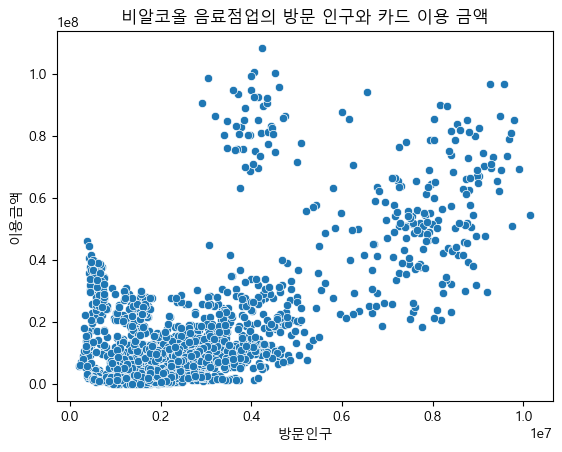

In [118]:
sns.scatterplot(cafe_df, x='방문인구', y='이용금액')
plt.title('비알코올 음료점업의 방문 인구와 카드 이용 금액')

In [120]:
cafe_df.corr(numeric_only=True)

,이용자수,이용금액,방문인구
이용자수,1.000,0.984,0.599
이용금액,0.984,1.000,0.633
방문인구,0.599,0.633,1.000


Text(0.5, 1.0, '전체 업종의 방문 인구와 카드 이용 금액')

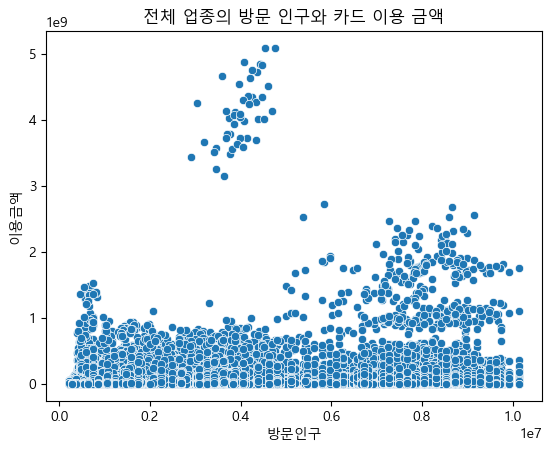

In [122]:
sns.scatterplot(jeju_df, x='방문인구', y='이용금액')
plt.title('전체 업종의 방문 인구와 카드 이용 금액')

In [124]:
jeju_df.corr(numeric_only=True)

,이용자수,이용금액,방문인구
이용자수,1.000,0.712,0.202
이용금액,0.712,1.000,0.163
방문인구,0.202,0.163,1.000
